In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/content/netflix_customer_churn.csv")

In [3]:
df.sample(5)

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
4215,ac2992f2-0f0b-410e-acc3-cd2df1cc164d,63,Other,Basic,36.14,53,Europe,Mobile,8.99,0,Credit Card,4,0.67,Drama
3657,dc5b0984-88d3-4ff3-b093-f0cfdb80070d,22,Female,Premium,0.79,17,North America,Mobile,17.99,1,Crypto,4,0.04,Horror
963,60edeb0f-1d93-4636-ad6d-7aafabfe9220,60,Female,Standard,9.16,37,North America,Tablet,13.99,1,Gift Card,5,0.24,Romance
1169,18bed870-a69b-40c0-8d97-e03ae32e7de8,29,Other,Standard,8.31,30,Asia,Mobile,13.99,0,PayPal,1,0.27,Action
4067,77a52f9c-7768-491c-9b1d-723ead182bdf,23,Other,Basic,10.62,52,North America,Mobile,8.99,1,Gift Card,4,0.20,Comedy


In [4]:
df = df.drop(columns=['customer_id'])
display(df.head())

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [5]:
df.dtypes

,0
age,int64
gender,object
subscription_type,object
watch_hours,float64
last_login_days,int64
region,object
device,object
monthly_fee,float64
churned,int64
payment_method,object


In [6]:
df.shape

(5000, 13)

churn = 1 mean left/yes,
churn = 0 mean not left/no

In [8]:
churn1 = df[df['churned'] == 1]
churn0 = df[df['churned'] == 0]

In [10]:
churn1

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action
7,51,Male,Basic,14.30,56,Europe,Mobile,8.99,1,Gift Card,1,0.25,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,57,Male,Standard,2.09,13,Asia,TV,13.99,1,Crypto,3,0.15,Romance
4992,34,Male,Standard,10.25,41,Oceania,Desktop,13.99,1,Crypto,3,0.24,Documentary
4993,23,Other,Standard,3.10,12,Europe,Laptop,13.99,1,Crypto,5,0.24,Comedy
4997,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,Debit Card,2,0.33,Action


In [11]:
churn0

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
5,58,Female,Standard,13.80,26,Oceania,Mobile,13.99,0,Debit Card,3,0.51,Action
6,48,Other,Basic,13.83,20,Asia,TV,8.99,0,Gift Card,5,0.66,Romance
8,45,Other,Basic,9.98,10,Asia,Mobile,8.99,0,PayPal,3,0.91,Romance
10,26,Male,Premium,15.42,36,Asia,Laptop,17.99,0,Debit Card,4,0.42,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,62,Male,Standard,7.31,26,Oceania,Desktop,13.99,0,Credit Card,2,0.27,Sci-Fi
4994,58,Other,Basic,10.90,22,Europe,TV,8.99,0,Credit Card,3,0.47,Action
4995,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,Credit Card,4,4.10,Drama
4996,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,PayPal,3,3.08,Documentary


In [12]:
churn1.shape

(2515, 13)

In [13]:
churn0.shape

(2485, 13)

In [18]:
df['churned'] = df['churned'].replace({1: 'Yes', 0: 'No'})
display(df.head())

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,Yes,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,Yes,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,No,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,Yes,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,Yes,Crypto,2,0.13,Action


In [24]:
churn1 = df[df['churned'] == 'Yes']
churn0 = df[df['churned'] == 'No']

In [25]:
df

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,Yes,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,Yes,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,No,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,Yes,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,Yes,Crypto,2,0.13,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19,Female,Basic,49.17,11,Europe,Desktop,8.99,No,Credit Card,4,4.10,Drama
4996,67,Female,Basic,9.24,2,North America,Desktop,8.99,No,PayPal,3,3.08,Documentary
4997,66,Male,Standard,16.55,49,South America,Desktop,13.99,Yes,Debit Card,2,0.33,Action
4998,59,Female,Basic,9.12,3,Europe,Laptop,8.99,No,Credit Card,4,2.28,Sci-Fi


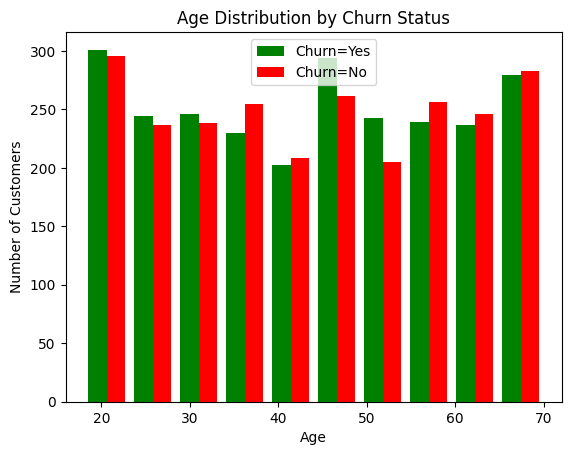

In [26]:
plt.hist([churn1['age'], churn0['age']], color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

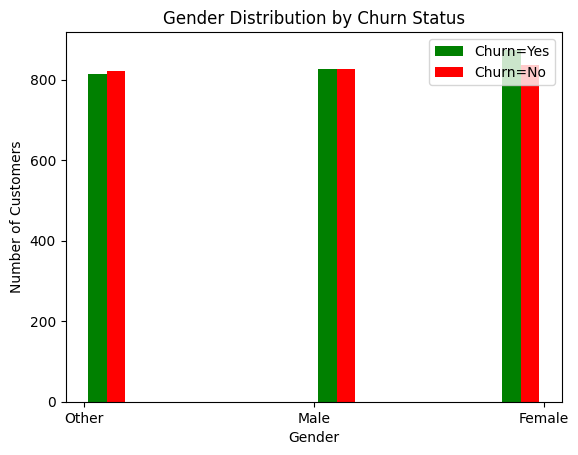

In [27]:
plt.hist([churn1['gender'], churn0['gender']], color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title('Gender Distribution by Churn Status')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

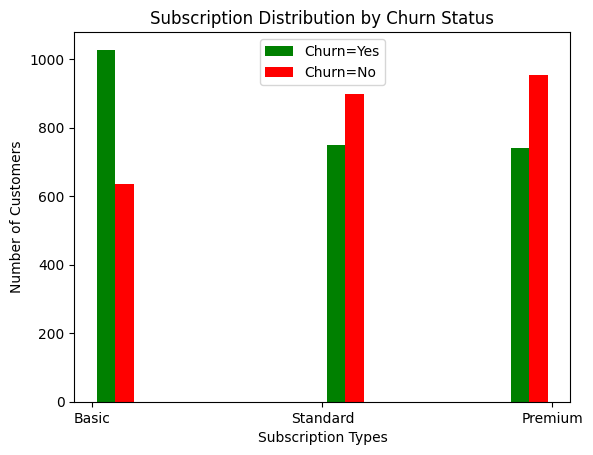

In [28]:
plt.hist([churn1['subscription_type'], churn0['subscription_type']], color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title('Subscription Distribution by Churn Status')
plt.xlabel('Subscription Types')
plt.ylabel('Number of Customers')
plt.show()

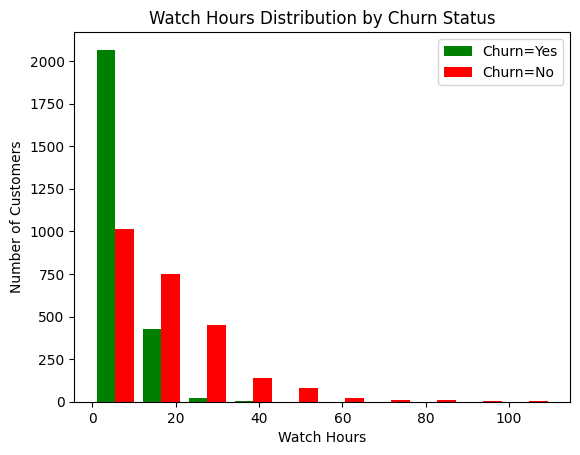

In [29]:
plt.hist([churn1['watch_hours'], churn0['watch_hours']], color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title('Watch Hours Distribution by Churn Status')
plt.xlabel('Watch Hours')
plt.ylabel('Number of Customers')
plt.show()

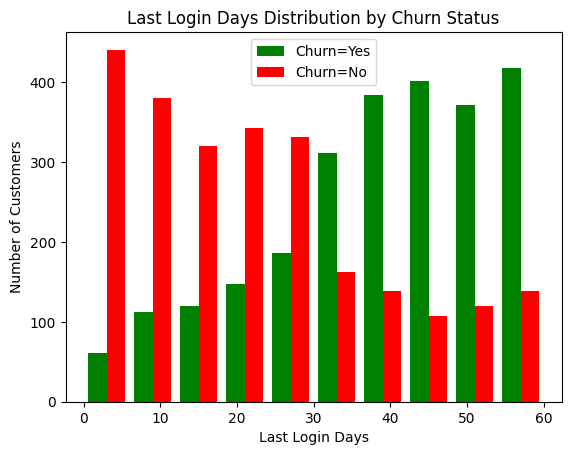

In [30]:
plt.hist([churn1['last_login_days'], churn0['last_login_days']], color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title('Last Login Days Distribution by Churn Status')
plt.xlabel('Last Login Days')
plt.ylabel('Number of Customers')
plt.show()

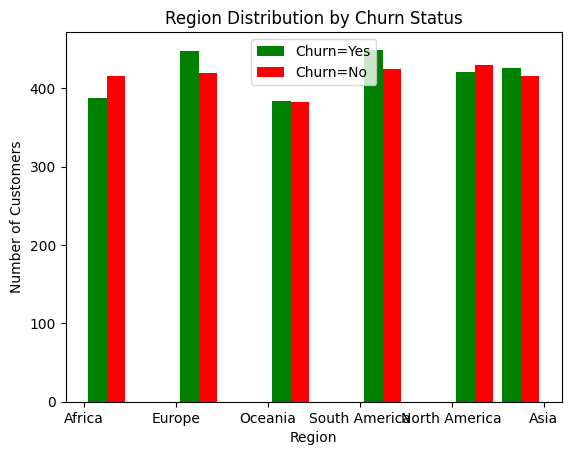

In [31]:
plt.hist([churn1['region'], churn0['region']], color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title('Region Distribution by Churn Status')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

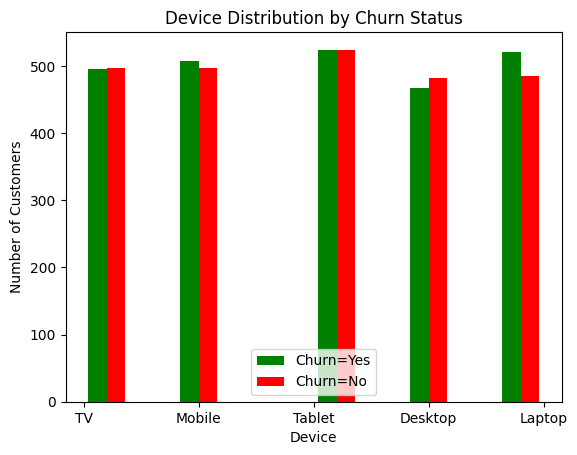

In [32]:
plt.hist([churn1['device'], churn0['device']], color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title('Device Distribution by Churn Status')
plt.xlabel('Device')
plt.ylabel('Number of Customers')
plt.show()

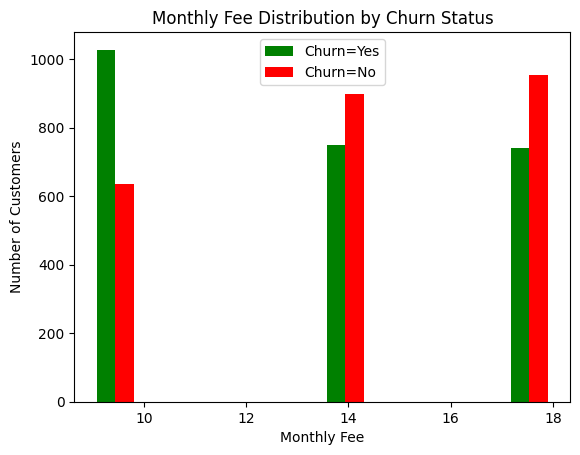

In [33]:
plt.hist([churn1['monthly_fee'], churn0['monthly_fee']], color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title('Monthly Fee Distribution by Churn Status')
plt.xlabel('Monthly Fee')
plt.ylabel('Number of Customers')
plt.show()

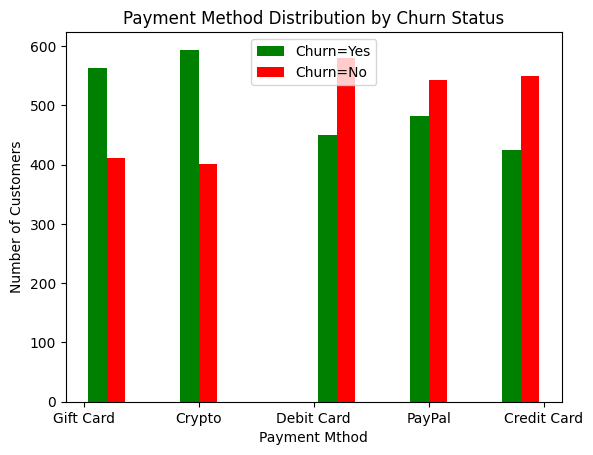

In [34]:
plt.hist([churn1['payment_method'], churn0['payment_method']], color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title('Payment Method Distribution by Churn Status')
plt.xlabel('Payment Mthod')
plt.ylabel('Number of Customers')
plt.show()

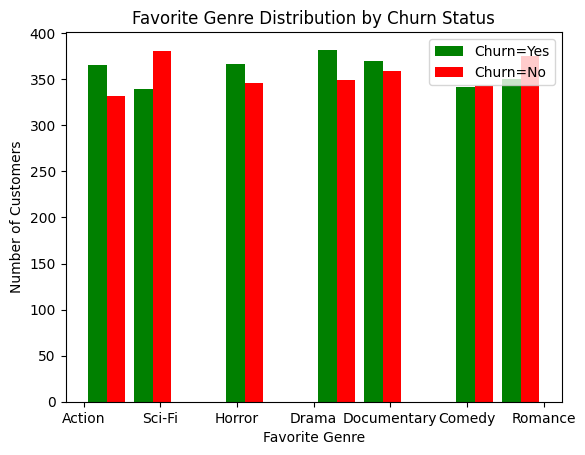

In [35]:
plt.hist([churn1['favorite_genre'], churn0['favorite_genre']], color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()
plt.title('Favorite Genre Distribution by Churn Status')
plt.xlabel('Favorite Genre')
plt.ylabel('Number of Customers')
plt.show()

In [36]:
df['churned'] = df['churned'].replace({'Yes': 1, 'No': 0})
display(df.head())

/tmp/ipython-input-243044262.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['churned'] = df['churned'].replace({'Yes': 1, 'No': 0})


,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [37]:
gender_counts = df['gender'].value_counts()
display(gender_counts)

,count
gender,
Female,1711
Male,1654
Other,1635


In [38]:
categorical_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,subscription_type_Premium,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,51,14.73,29,8.99,1,1,0.49,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,47,0.70,19,13.99,1,5,0.03,False,True,False,...,False,False,True,False,False,False,False,False,False,True
2,27,16.32,10,13.99,0,2,1.48,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,53,4.51,12,17.99,1,2,0.35,False,True,True,...,True,False,False,False,False,False,False,True,False,False
4,56,1.89,13,13.99,1,2,0.13,False,True,False,...,True,False,False,False,False,False,False,False,False,False


In [39]:
df_encoded

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,subscription_type_Premium,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,51,14.73,29,8.99,1,1,0.49,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,47,0.70,19,13.99,1,5,0.03,False,True,False,...,False,False,True,False,False,False,False,False,False,True
2,27,16.32,10,13.99,0,2,1.48,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,53,4.51,12,17.99,1,2,0.35,False,True,True,...,True,False,False,False,False,False,False,True,False,False
4,56,1.89,13,13.99,1,2,0.13,False,True,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19,49.17,11,8.99,0,4,4.10,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4996,67,9.24,2,8.99,0,3,3.08,False,False,False,...,False,False,False,True,False,True,False,False,False,False
4997,66,16.55,49,13.99,1,2,0.33,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4998,59,9.12,3,8.99,0,4,2.28,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [40]:
df_encoded.dtypes

,0
age,int64
watch_hours,float64
last_login_days,int64
monthly_fee,float64
churned,int64
number_of_profiles,int64
avg_watch_time_per_day,float64
gender_Male,bool
gender_Other,bool
subscription_type_Premium,bool


In [41]:
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)
display(df_encoded.head())

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,subscription_type_Premium,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,51,14.73,29,8.99,1,1,0.49,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,47,0.70,19,13.99,1,5,0.03,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,27,16.32,10,13.99,0,2,1.48,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,53,4.51,12,17.99,1,2,0.35,0,1,1,...,1,0,0,0,0,0,0,1,0,0
4,56,1.89,13,13.99,1,2,0.13,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [42]:
df_encoded.dtypes

,0
age,int64
watch_hours,float64
last_login_days,int64
monthly_fee,float64
churned,int64
number_of_profiles,int64
avg_watch_time_per_day,float64
gender_Male,int64
gender_Other,int64
subscription_type_Premium,int64


In [44]:
cols_to_scale = ['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

In [45]:
for col in df_encoded:
    print(f'{col}: {df_encoded[col].unique()}')

age: [0.63461538 0.55769231 0.17307692 0.67307692 0.73076923 0.76923077
 0.57692308 0.51923077 0.26923077 0.15384615 0.19230769 0.59615385
 0.40384615 0.53846154 0.96153846 0.05769231 0.80769231 1.
 0.34615385 0.71153846 0.11538462 0.23076923 0.98076923 0.94230769
 0.09615385 0.75       0.32692308 0.07692308 0.30769231 0.01923077
 0.13461538 0.69230769 0.25       0.46153846 0.86538462 0.92307692
 0.38461538 0.90384615 0.48076923 0.88461538 0.84615385 0.44230769
 0.         0.82692308 0.36538462 0.03846154 0.61538462 0.28846154
 0.78846154 0.21153846 0.65384615 0.42307692 0.5       ]
watch_hours: [0.13334541 0.00625057 0.14774889 ... 0.44533019 0.14983241 0.08252559]
last_login_days: [0.48333333 0.31666667 0.16666667 0.2        0.21666667 0.43333333
 0.33333333 0.93333333 0.56666667 0.6        0.63333333 0.38333333
 0.55       0.11666667 0.53333333 0.66666667 0.45       0.06666667
 0.95       0.71666667 0.3        0.1        0.91666667 0.88333333
 0.86666667 0.         0.8        0.2666

In [46]:
df_encoded

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,subscription_type_Premium,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,0.634615,0.133345,0.483333,0.000000,1,0.00,0.004979,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0.557692,0.006251,0.316667,0.555556,1,1.00,0.000305,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0.173077,0.147749,0.166667,0.555556,0,0.25,0.015038,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0.673077,0.040765,0.200000,1.000000,1,0.25,0.003556,0,1,1,...,1,0,0,0,0,0,0,1,0,0
4,0.730769,0.017031,0.216667,0.555556,1,0.25,0.001321,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.019231,0.445330,0.183333,0.000000,0,0.75,0.041658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4996,0.942308,0.083613,0.033333,0.000000,0,0.50,0.031294,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4997,0.923077,0.149832,0.816667,0.555556,1,0.25,0.003353,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4998,0.788462,0.082526,0.050000,0.000000,0,0.75,0.023166,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
X = df_encoded.drop('churned',axis='columns')
y = df_encoded['churned']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [50]:
X_train.shape

(4000, 29)

In [51]:
X_test.shape

(1000, 29)

In [52]:
X_train[:10]

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,subscription_type_Premium,subscription_type_Standard,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
1282,0.038462,0.127185,0.200000,0.000000,0.25,0.010973,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2348,0.846154,0.008878,0.716667,1.000000,1.00,0.000203,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
816,0.173077,0.054353,0.083333,1.000000,0.00,0.010161,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3866,0.730769,0.189329,0.583333,0.000000,0.75,0.005893,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
245,0.076923,0.237974,0.800000,0.000000,0.50,0.005487,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4603,0.846154,0.015400,0.216667,0.000000,0.75,0.001219,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3081,0.423077,0.104720,0.183333,1.000000,0.50,0.009754,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2646,0.057692,0.465984,0.400000,0.555556,0.00,0.020931,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2181,0.846154,0.145756,0.900000,0.000000,0.25,0.002947,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
656,0.134615,0.040040,0.183333,1.000000,1.00,0.003759,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
len(X_train.columns)

29

In [55]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(29, input_shape=(29,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5344 - loss: 0.6905
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6813 - loss: 0.6152
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7839 - loss: 0.4659
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.3792
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8543 - loss: 0.3185
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8668 - loss: 0.2929
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8841 - loss: 0.2657
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8874 - loss: 0.2547
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8958 - loss: 0.2389
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8972 - loss: 0.2304
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9004 - loss: 0.2331
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [56]:
model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8681 - loss: 0.3202


[0.292418509721756, 0.8840000033378601]

In [57]:
yp = model.predict(X_test)
yp[:5]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[9.9999881e-01],
       [9.7007367e-11],
       [5.0039840e-01],
       [3.3702007e-01],
       [7.9264861e-01]], dtype=float32)

In [58]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [59]:
y_pred[:10]

[1, 0, 1, 0, 1, 1, 0, 1, 1, 1]

In [60]:
y_test[:10]

,churned
27,1
1482,0
3021,1
3867,0
637,0
4191,0
3042,0
775,0
3767,1
3954,0


In [61]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       495
           1       0.86      0.91      0.89       505

    accuracy                           0.88      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



Text(95.72222222222221, 0.5, 'Truth')

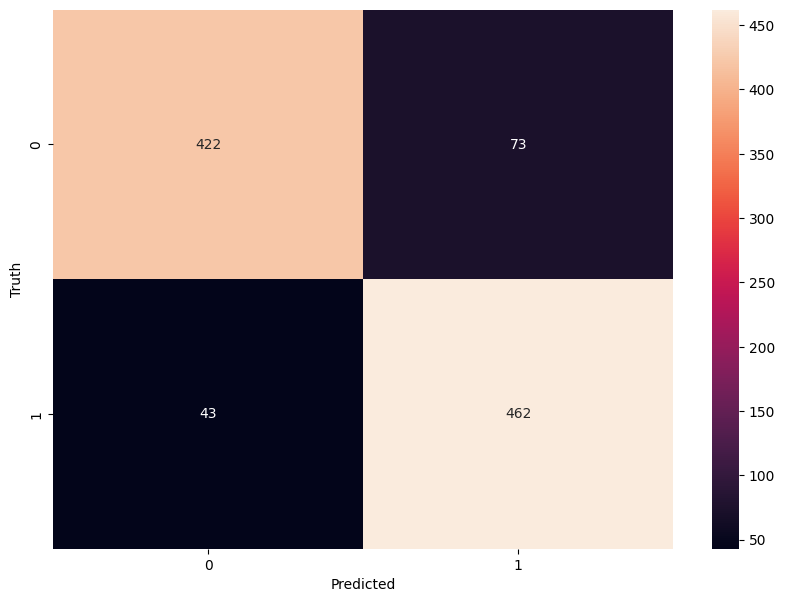

In [62]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
y_test.shape

(1000,)

In [66]:
accuracy = round((422+462)/(422+73+43+462),2)
accuracy

0.88

In [67]:
precision = round((462)/(462+73),2)
precision

0.86

In [68]:
recall = round((462)/(462+43),2)
recall

0.91